In [1]:
#!pip install pandas
#!pip install matplotlib
#!pip install seaborn
#!pip install SQLAlchemy

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sqlalchemy import create_engine

In [4]:
#set parameters
db_user = 'postgres'
db_password = 'postgres'
db_host = 'localhost'
db_port = '5432'
db_name = 'dsi_project'
file_name = '../wienerlinien-ogd-haltepunkte.csv'

In [5]:
#init database
engine = create_engine(f'postgresql://{db_user}:{db_password}@{db_host}:{db_port}/{db_name}')
try:
    engine.connect()
    print("success")
except SQLAlchemyError as err:
    print("error", err.__cause__)

success


In [7]:
df_stations = pd.read_csv('../data/wienerlinien-ogd-haltepunkte.csv', sep=';', usecols=[0,2,5,6], names=['id','name','longitude','latitude'], header=0)
df_stations.head()

,id,name,longitude,latitude
0,2,Venediger Au,NaN,NaN
1,3,Messe Prater,NaN,NaN
2,4,Perspektivstraße,16.401041,48.217915
3,5,Börse,16.366002,48.215563
4,7,"Praterstern, Lassallestraße",16.393769,48.219549


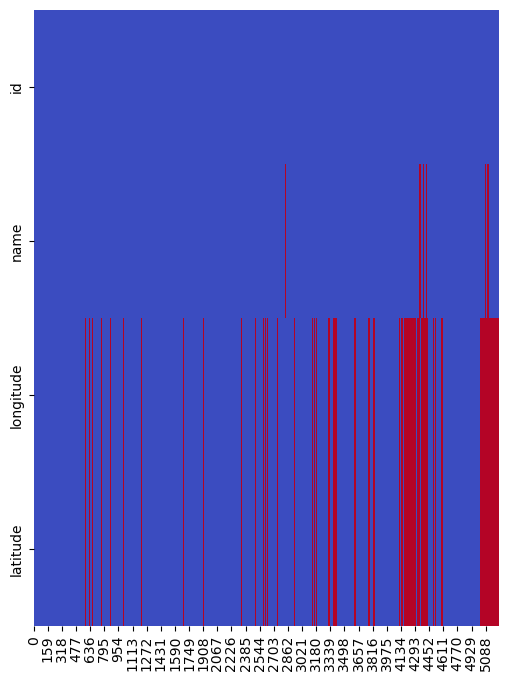

In [6]:
plt.figure(figsize=(6, 8))
sns.heatmap(df_stations.T.isnull(), cbar=False, cmap='coolwarm')
plt.show()

In [9]:
df_stations = df_stations.dropna()

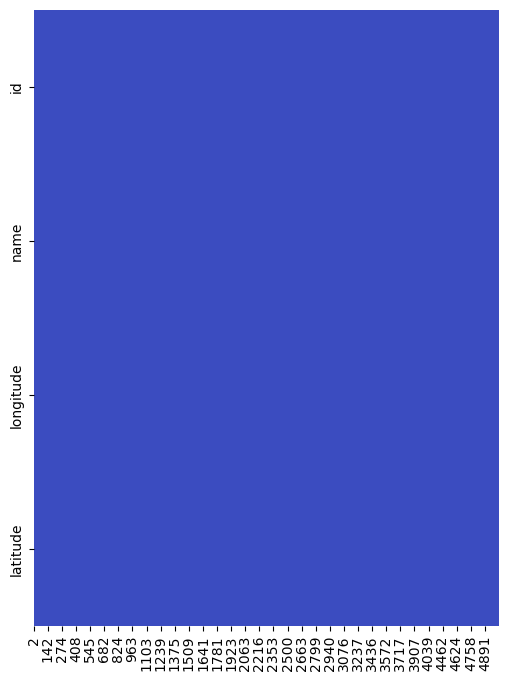

In [10]:
plt.figure(figsize=(6, 8))
sns.heatmap(df_stations.T.isnull(), cbar=False, cmap='coolwarm')
plt.show()

In [17]:
df_stations.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4353 entries, 2 to 5103
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id         4353 non-null   int64  
 1   name       4353 non-null   object 
 2   longitude  4353 non-null   float64
 3   latitude   4353 non-null   float64
dtypes: float64(2), int64(1), object(1)
memory usage: 299.1+ KB


In [19]:
# df_stations[df_stations.duplicated('name')].value_counts()
df_stations = df_stations.drop_duplicates('name')

In [20]:
df_stations.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1984 entries, 2 to 5029
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id         1984 non-null   int64  
 1   name       1984 non-null   object 
 2   longitude  1984 non-null   float64
 3   latitude   1984 non-null   float64
dtypes: float64(2), int64(1), object(1)
memory usage: 77.5+ KB


In [21]:
df_stations.head()

,id,name,longitude,latitude
2,4,Perspektivstraße,16.401041,48.217915
3,5,Börse,16.366002,48.215563
4,7,"Praterstern, Lassallestraße",16.393769,48.219549
5,8,Hauptbahnhof S U,16.374976,48.185919
6,9,Julius-Raab-Platz,16.382567,48.210343


In [ ]:
df_stations.to_sql('stops', engine, if_exists='replace', index=False)